<a href="https://colab.research.google.com/github/lakshitachawla/CryptoTraderAnalysis/blob/main/CryptoTrader_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the Datasets

In [ ]:
# 1. Historical Dataset
df_data = pd.read_csv("/content/historical_data.csv")
df_data #Displaying the dataset

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [ ]:
#Displaying the number of rows and columns in the dataset
df_data.shape

(211224, 16)

In [ ]:
#Extracting info about the null values in the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
# Finding the count of null values in all the columns of the dataset.
df_data.isnull().sum().sort_values(ascending=False)

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


*Since the data is preprocessed, no further cleaning is necessary*

In [ ]:
#Checking the Statistical Information of the dataset
df_data.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [ ]:
# 2. Fear and Greed Index Dataset
df_index=pd.read_csv('/content/fear_greed_index.csv')
df_index #Previewing the dataset

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [ ]:
df_data.info() #Extracting info about each column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
#Finding the number of null values in each column
df_data.isnull().sum().sort_values(ascending=False)

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


*Since the data is preprocessed, no further cleaning is necessary*

# Data Manipulation

In [ ]:
# Converting 'Timestamp IST' to datetime with format specified
df_data['Timestamp IST'] = pd.to_datetime(df_data['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Convert 'date' column in df_index
df_index['date'] = pd.to_datetime(df_index['date'])

# Extracting date only (removing time to ensure both the columns have the same date format)
df_data['date'] = pd.to_datetime(df_data['Timestamp IST'].dt.date)
df_index['date'] = pd.to_datetime(df_index['date'].dt.date)

# Merging datasets on date
merged_df = pd.merge(df_data, df_index[['date', 'classification']], on='date', how='inner')

# Dropping rows missing PnL or classification, which now includes rows with NaT in 'Timestamp IST'
merged_df.dropna(subset=['Closed PnL', 'classification'], inplace=True)

# Preview
print(merged_df[['Account', 'Coin', 'Side', 'Closed PnL', 'classification']].head())

                                      Account  Coin Side  Closed PnL  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   

  classification  
0  Extreme Greed  
1  Extreme Greed  
2  Extreme Greed  
3  Extreme Greed  
4  Extreme Greed  


# Data Visualization

**Data Analysation**

Analysing dataset on the following basis:-

*   Average Closed PnL under Fear vs Greed
*   Win Rate under Fear vs Greed Sentiments
*   Average Trade Size (Tokens) and Number of Trades by Sentiment
*   Average Closed PnL by Trade Direction and Market Sentiment
*   Top 5 and Bottom 5 Accounts by Total Closed PnL
*   Daily Total Closed PnL vs Market Sentiment
*   Correlation between Daily Average Closed PnL and Market Sentiment
*   Win Rate during Market Sentiment Phases


<ipython-input-86-ca2dcd250456>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=avg_pnl, palette='rocket')


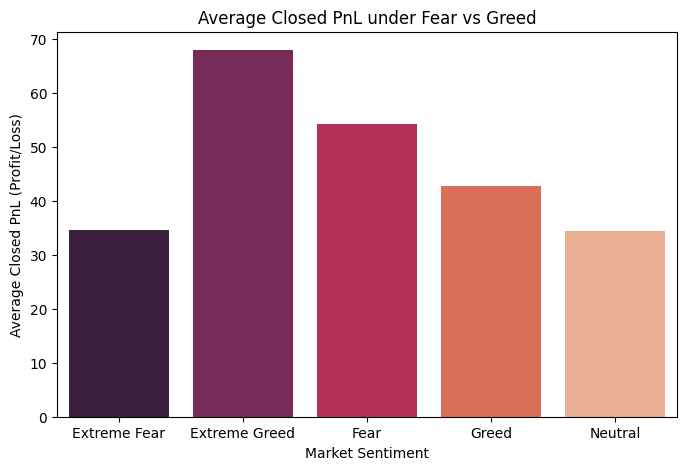

In [ ]:
# Group by sentiment classification and calculate average Closed PnL
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='Closed PnL', data=avg_pnl, palette='rocket')
plt.title('Average Closed PnL under Fear vs Greed')
plt.ylabel('Average Closed PnL (Profit/Loss)')
plt.xlabel('Market Sentiment')
plt.show()


*Traders tend to realize higher average profits during Extreme Greed phases compared to Extreme Fear phases.*

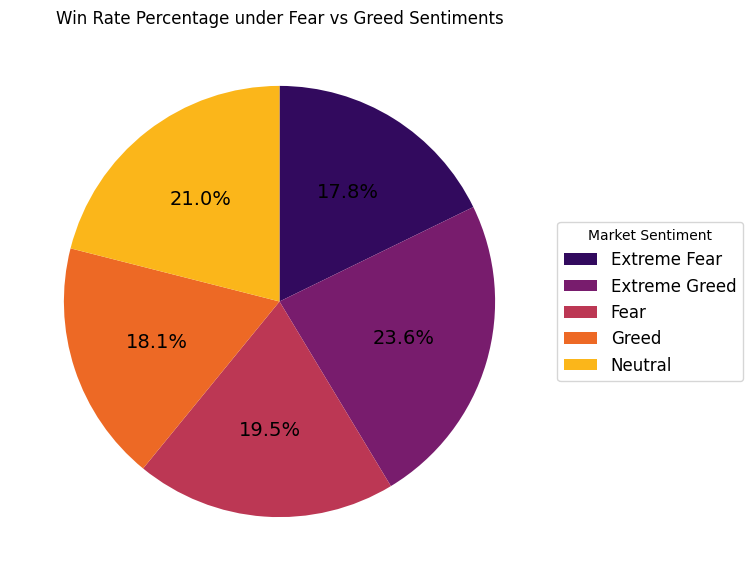

In [ ]:
# Add legend with classification labels
colors = sns.color_palette('inferno', n_colors=len(win_rate))

plt.figure(figsize=(7,7))

# Plot pie chart without labels (to keep it clean)
wedges, texts, autotexts = plt.pie(
    win_rate['win_rate_percent'],
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 14}
)

# Add legend with classification labels
plt.legend(wedges, win_rate['classification'], title="Market Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

plt.title('Win Rate Percentage under Fear vs Greed Sentiments',loc="center")
plt.show()

The probability of profitable trades is significantly higher when market sentiment is Extreme Greed.

<ipython-input-87-c83c380bac0e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Size Tokens', data=avg_size_tokens, palette='magma')
<ipython-input-87-c83c380bac0e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='trade_count', data=trade_counts, palette='magma')


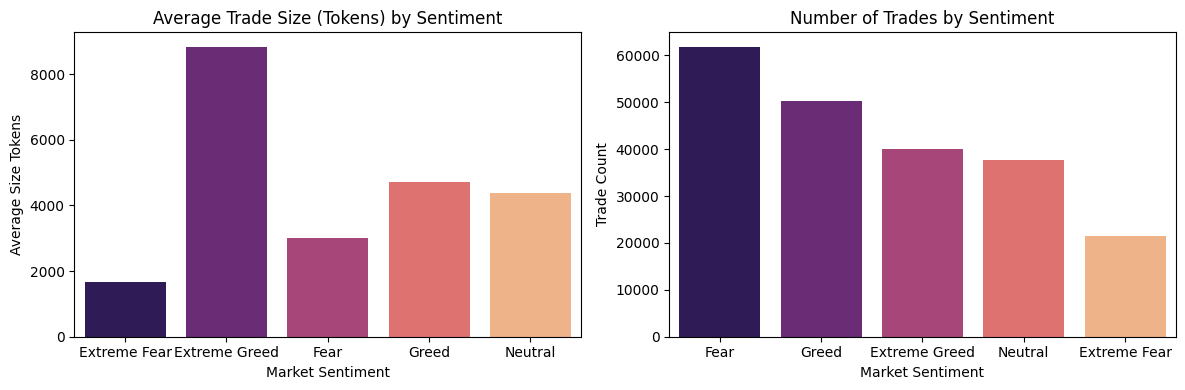

In [ ]:
# Average Size Tokens by sentiment
avg_size_tokens = merged_df.groupby('classification')['Size Tokens'].mean().reset_index()

# Count of trades by sentiment
trade_counts = merged_df['classification'].value_counts().reset_index()
trade_counts.columns = ['classification', 'trade_count']

# Plot average trade size
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x='classification', y='Size Tokens', data=avg_size_tokens, palette='magma')
plt.title('Average Trade Size (Tokens) by Sentiment')
plt.ylabel('Average Size Tokens')
plt.xlabel('Market Sentiment')

# Plot number of trades
plt.subplot(1,2,2)
sns.barplot(x='classification', y='trade_count', data=trade_counts, palette='magma')
plt.title('Number of Trades by Sentiment')
plt.ylabel('Trade Count')
plt.xlabel('Market Sentiment')

plt.tight_layout()
plt.show()

*Average Trade sizes are generally larger and more frequent during Extreme Greed periods.*

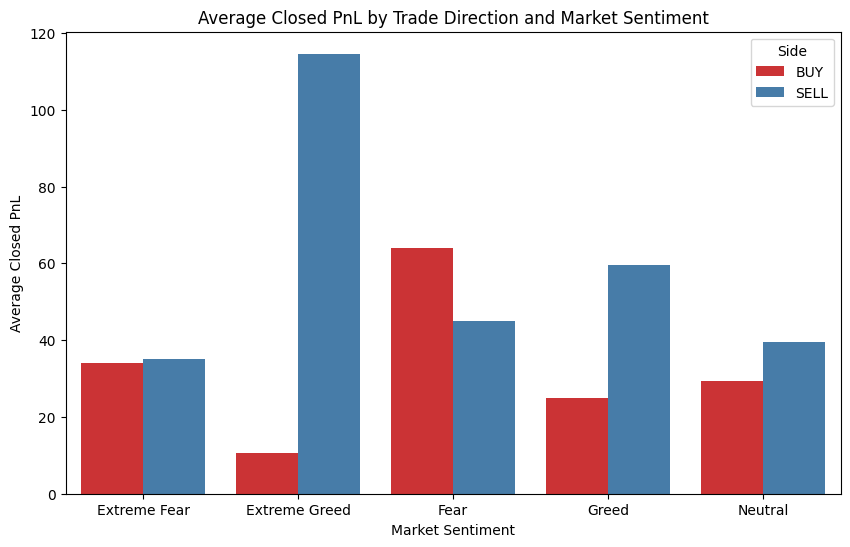

In [ ]:
# Group by sentiment and side, calculate average Closed PnL
direction_pnl = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().reset_index()

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=direction_pnl, x='classification', y='Closed PnL', hue='Side', palette='Set1')
plt.title('Average Closed PnL by Trade Direction and Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()


*Buy and sell trades perform differently under Fear and Greed, with notable variations in profitability.*

<ipython-input-24-d7429ad5f281>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_accounts['short_account'] = top_accounts['Account'].str.slice(0,8) + '...'
<ipython-input-24-d7429ad5f281>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_accounts['short_account'] = bottom_accounts['Account'].str.slice(0,8) + '...'


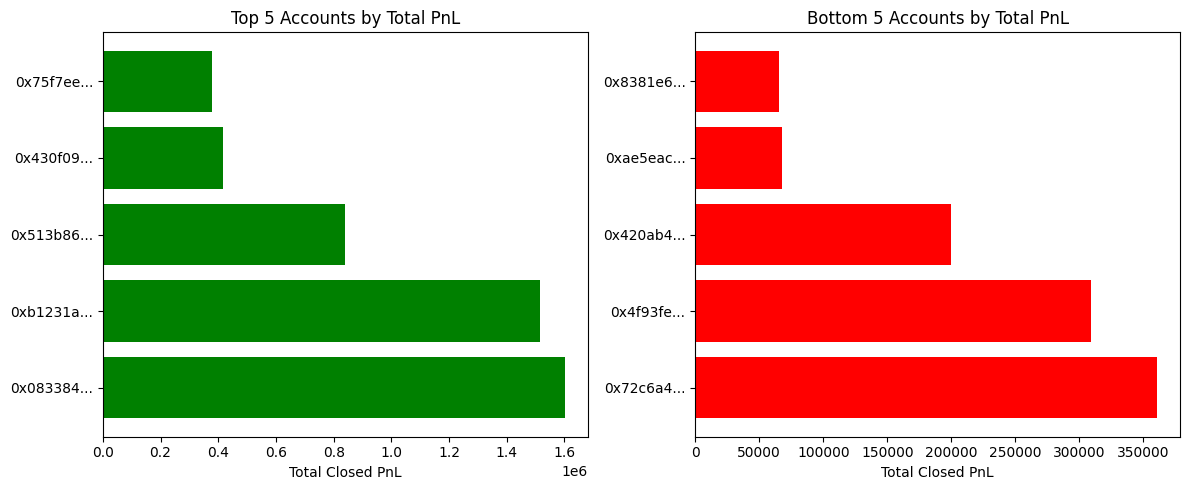

In [ ]:
# Aggregate PnL by account
account_pnl = merged_df.groupby('Account')['Closed PnL'].sum().reset_index()

# Sorting to find top and bottom accounts
account_pnl_sorted = account_pnl.sort_values(by='Closed PnL', ascending=False)

# Selecting top and bottom 5 accounts
top_accounts = account_pnl_sorted.head(5)
bottom_accounts = account_pnl_sorted.tail(5)

#  Storing account names
top_accounts['short_account'] = top_accounts['Account'].str.slice(0,8) + '...'
bottom_accounts['short_account'] = bottom_accounts['Account'].str.slice(0,8) + '...'

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.barh(top_accounts['short_account'], top_accounts['Closed PnL'], color='green')
plt.title('Top 5 Accounts by Total PnL')
plt.xlabel('Total Closed PnL')

plt.subplot(1,2,2)
plt.barh(bottom_accounts['short_account'], bottom_accounts['Closed PnL'], color='red')
plt.title('Bottom 5 Accounts by Total PnL')
plt.xlabel('Total Closed PnL')

plt.tight_layout()
plt.show()

*A small group of traders consistently outperform or underperform*

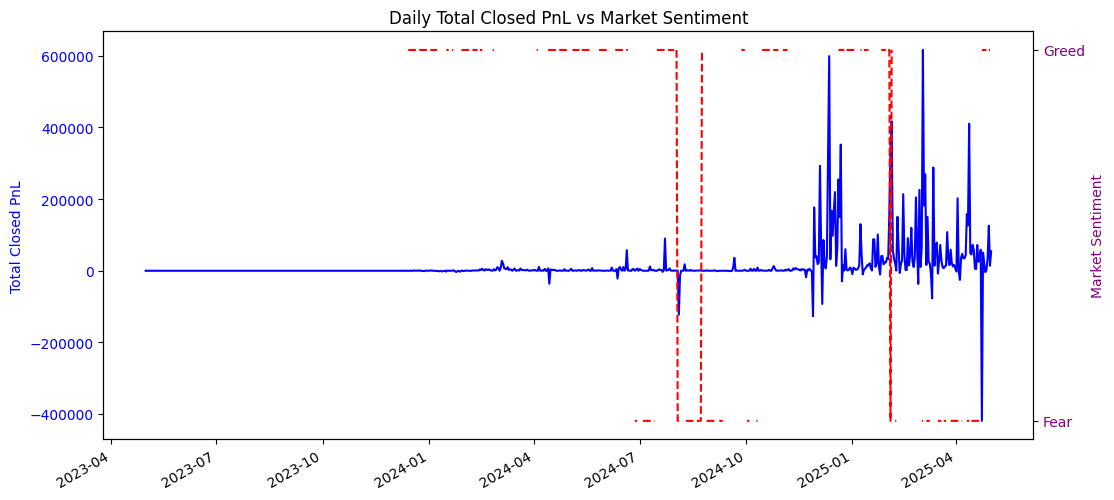

In [ ]:
# Aggregate daily total Closed PnL
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum().reset_index()

# Get daily sentiment (classification)
daily_sentiment = df_index[['date', 'classification']].drop_duplicates()

# Merge daily pnl with sentiment
daily_summary = pd.merge(daily_pnl, daily_sentiment, on='date', how='left')

# Map classification to numeric for plotting
sentiment_map = {'Fear': 0, 'Greed': 1}
daily_summary['sentiment_numeric'] = daily_summary['classification'].map(sentiment_map)

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(daily_summary['date'], daily_summary['Closed PnL'], color='blue', label='Total Daily Closed PnL')
ax1.set_ylabel('Total Closed PnL', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(daily_summary['date'], daily_summary['sentiment_numeric'], color='red', linestyle='--', label='Sentiment (0=Fear,1=Greed)')
ax2.set_ylabel('Market Sentiment', color='purple')
ax2.set_yticks([0,1])
ax2.set_yticklabels(['Fear', 'Greed'])
ax2.tick_params(axis='y', labelcolor='purple')

plt.title('Daily Total Closed PnL vs Market Sentiment')
fig.autofmt_xdate()
plt.show()

*Daily trader profits fluctuate in tandem with shifts between Fear and Greed sentiments.*

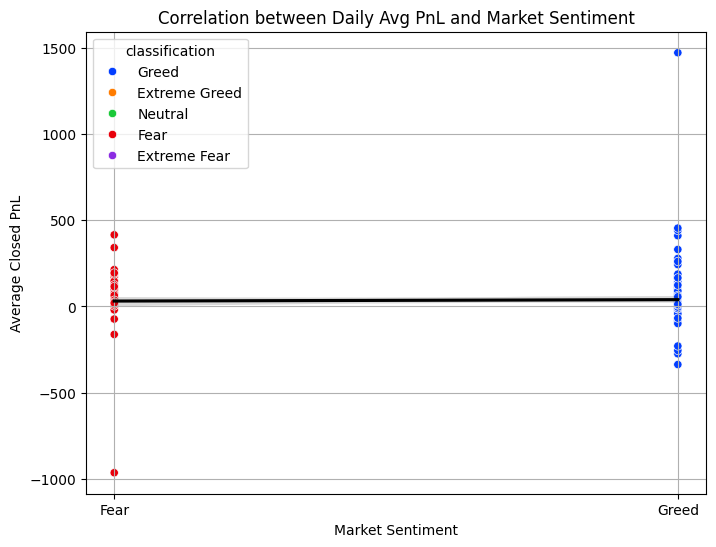

In [ ]:
# Average daily PnL
daily_avg_pnl = merged_df.groupby('date')['Closed PnL'].mean().reset_index()

# Get sentiment
daily_sentiment = df_index[['date', 'classification']].drop_duplicates()

# Merging data
corr_df = pd.merge(daily_avg_pnl, daily_sentiment, on='date', how='inner')

# Map sentiment to numeric (Greed=1, Fear=0)
corr_df['sentiment_numeric'] = corr_df['classification'].map({'Fear': 0, 'Greed': 1})

# Calculate Pearson correlation with numpy
correlation = np.corrcoef(corr_df['Closed PnL'], corr_df['sentiment_numeric'])[0, 1]

# Plot correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=corr_df, x='sentiment_numeric', y='Closed PnL', hue='classification', palette='bright')
sns.regplot(data=corr_df, x='sentiment_numeric', y='Closed PnL', scatter=False, color='black')
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title('Correlation between Daily Avg PnL and Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.grid(True)
plt.show()

*Daily trader profits fluctuate in tandem with shifts between Fear and Greed sentiments.*

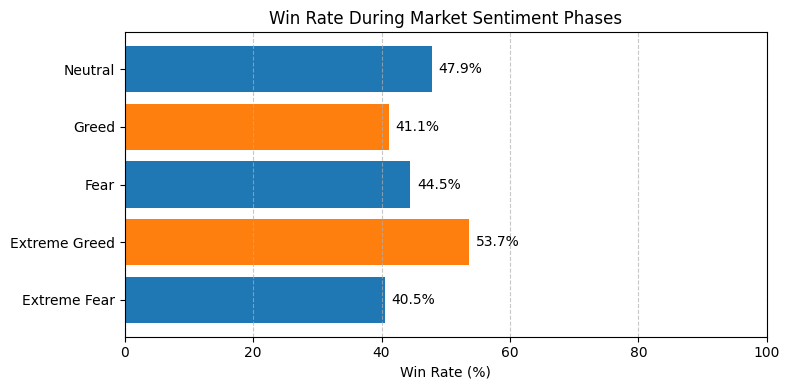

In [ ]:
plt.figure(figsize=(8, 4))

# Horizontal bar plot
bars = plt.barh(win_stats['Sentiment'], win_stats['Win Rate (%)'], color=["#1f77b4", "#ff7f0e"])

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center', fontsize=10)

plt.title('Win Rate During Market Sentiment Phases')
plt.xlabel('Win Rate (%)')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Traders exhibit noticeably higher win rates during Extreme Greed phases compared to Extreme Fear, highlighting sentiments impact on trading success.*

# Conclusion

The analysis shows that CryptoCurency market sentiment plays a crucial role in how traders perform. When the market is driven by Greed, traders tend to make more profit, trade larger amounts, and win more often. On the other hand, during Fear phases, trading results generally decline. These insights highlight the value of paying close attention to market sentiment when making trading decisions, helping traders develop smarter strategies and achieve better outcomes.

